In [16]:
import pandas as pd

df = pd.read_csv("sample_datasets.csv")

print(df.head())

                                               Title       Item ID  Price  \
0  Christmas Tapestry Christmas Tree Wall Tapestr...  296799369044  21.08   
1  Linmark Reindeer Plush Lovey My First Christma...  356230904615  13.95   
2  3D Felt Christmas Tree 2.29ft Christmas Tree S...  395855956929  19.41   
3  Christmas Wreath，Christmas Gnomes ，Christmas W...  365215174133  17.70   
4  Rudolph the Red Nose Reindeer Plush Blanket 40...  286137612231  12.99   

  Currency  Condition                 Category                  Seller  \
0      USD        New  Wall Decals & Vinyl Art   cozy-home-innovations   
1      USD  Pre-owned        Blankets & Throws  appalachianhillsliving   
2      USD        New  Developmental Baby Toys                 phyinde   
3      USD        New            Wall Hangings                  dwd279   
4      USD  Pre-owned        Blankets & Throws                diana127   

   Feedback Score  Positive Feedback %  Top Rated Seller  ...  \
0            4137          

In [25]:
# Inspect data overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 10000 non-null  object 
 1   Item ID               10000 non-null  int64  
 2   Price                 10000 non-null  float64
 3   Currency              10000 non-null  object 
 4   Condition             9817 non-null   object 
 5   Category              10000 non-null  object 
 6   Seller                10000 non-null  object 
 7   Feedback Score        10000 non-null  int64  
 8   Positive Feedback %   10000 non-null  float64
 9   Top Rated Seller      10000 non-null  bool   
 10  Shipping Type         10000 non-null  object 
 11  Shipping Cost         8206 non-null   float64
 12  Listing Type          10000 non-null  object 
 13  Buy It Now Available  10000 non-null  bool   
 14  Start Time            10000 non-null  object 
 15  End Time            

In [26]:
# Summary statistics for numerical columns
print(df.describe().transpose())

                       count          mean           std           min  \
Item ID              10000.0  2.914554e+11  8.781194e+10  1.128357e+11   
Price                10000.0  2.943291e+01  2.303681e+01  1.000000e-02   
Feedback Score       10000.0  3.762336e+03  5.275370e+04  0.000000e+00   
Positive Feedback %  10000.0  9.692232e+01  1.511262e+01  0.000000e+00   
Shipping Cost         8206.0  1.076230e+00  2.835489e+00  0.000000e+00   

                              25%           50%           75%           max  
Item ID              2.050809e+11  3.158715e+11  3.652067e+11  4.053313e+11  
Price                1.394750e+01  2.279000e+01  3.866000e+01  2.999900e+02  
Feedback Score       2.800000e+01  2.705000e+02  1.871250e+03  2.937764e+06  
Positive Feedback %  9.900000e+01  1.000000e+02  1.000000e+02  1.000000e+02  
Shipping Cost        0.000000e+00  0.000000e+00  0.000000e+00  5.980000e+01  


In [ ]:
# Summary statistics for categorical columns
print(df.describe(include='object').transpose())

                      count unique  \
Title                 10000   9092   
Currency              10000      4   
Condition              9817      8   
Category              10000    157   
Seller                10000   3403   
Shipping Type         10000      6   
Listing Type          10000      4   
Start Time            10000   8988   
End Time              10000   8938   
Store Name             8837   2457   
Store URL              8837   2457   
Gallery URL           10000   9813   
Large Image URL        9881   9703   
Super Size Image URL   9881   9703   
View Item URL         10000   9849   
Marketplace           10000      1   

                                                                    top   freq  
Title                 135Pcs Christmas Window Clings Snowflakes Wind...     14  
Currency                                                            USD   9875  
Condition                                                           New   6025  
Category                     

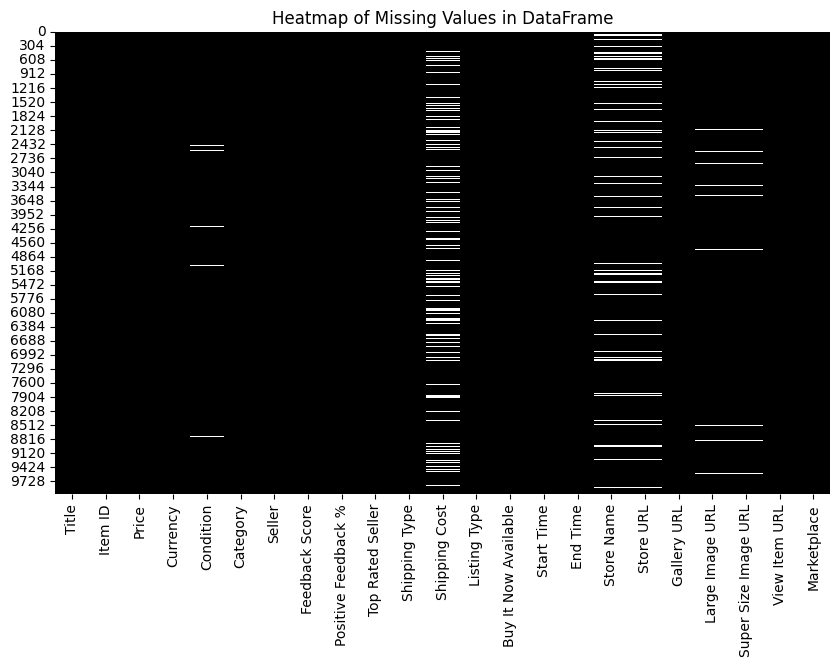

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='grey', cbar=False)
plt.title('Heatmap of Missing Values in DataFrame')
plt.show()

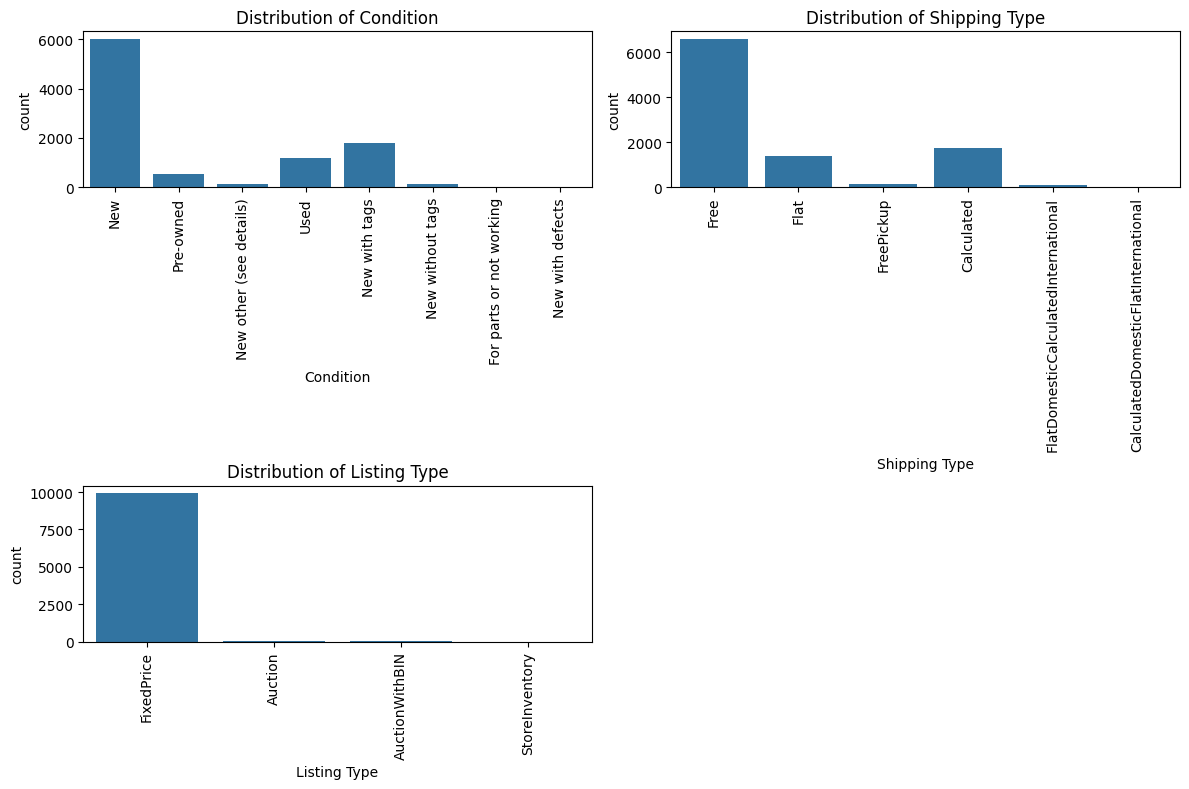

In [37]:
# Visualize Distribution of Categorical Columns

# Identify categorical columns in the DataFrame
categorical_columns = ['Condition', 'Shipping Type', 'Listing Type']

# Set up a 2x2 grid of subplots (adjust rows/columns as needed)
plt.figure(figsize=(12, 8))

# Plot each column in a subplot
for i, col in enumerate(categorical_columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.tight_layout()

plt.show()

In [81]:
print(df['Top_Level_Category'].value_counts())

Top_Level_Category
Other                           5242
Toys & Play                     2237
Feeding & Nursing               1177
Nursery & Bedding                831
Health & Safety                  198
Holiday & Gifts                  163
Baby Furniture & Accessories      99
Bathroom & Hygiene                53
Name: count, dtype: int64


In [ ]:
# Handle missing values of categorical columns

# Define the columns to replace missing values
cols_to_fill = ['Condition', 'Store Name', 'Store URL', 'Large Image URL', 'Super Size Image URL']

# Replace missing values with 'Unknown' for each column
df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

In [43]:
# Handle missing values of numerical columns

# Define the columns to replace missing values
cols_to_fill = ['Shipping Cost']

# Replace missing values for each column
df[cols_to_fill] = df[cols_to_fill].fillna(0)

In [44]:
# Verify that missing values are filled
print(df.isna().sum())

Title                   0
Item ID                 0
Price                   0
Currency                0
Condition               0
Category                0
Seller                  0
Feedback Score          0
Positive Feedback %     0
Top Rated Seller        0
Shipping Type           0
Shipping Cost           0
Listing Type            0
Buy It Now Available    0
Start Time              0
End Time                0
Store Name              0
Store URL               0
Gallery URL             0
Large Image URL         0
Super Size Image URL    0
View Item URL           0
Marketplace             0
dtype: int64


### Optimal Price Range by Category

Here, we identify typical price ranges for each category, which can help sellers set competitive prices

In [ ]:
# Calculate min, max, and average prices by category
category_price_stats = df.groupby('Category')['Price'].agg(['min', 'max', 'mean', 'count']).reset_index()

# Filter for top 10 categories by average price
top_categories = category_price_stats.nlargest(10, 'mean')

# Print value counts
print(top_categories.value_counts())

Category                      min     max     mean        count
Art Prints                    99.99   99.99   99.990000   1        1
Bouncers & Vibrating Chairs   95.98   95.98   95.980000   1        1
Changing Pads & Covers        15.17   186.12  63.083448   29       1
Convertible Car Seat 5-40lbs  62.09   72.96   67.525000   2        1
Diaper Stackers               59.25   94.03   76.640000   2        1
Duvet Inserts                 51.18   88.85   64.980000   4        1
Food Grinders & Blenders      29.21   129.80  70.345000   6        1
Formula                       135.00  149.00  142.000000  2        1
Infant Car Seat 5-20 lbs      51.98   102.73  74.630000   13       1
Nursery Bedding Sets          6.99    154.95  63.186667   12       1
Name: count, dtype: int64


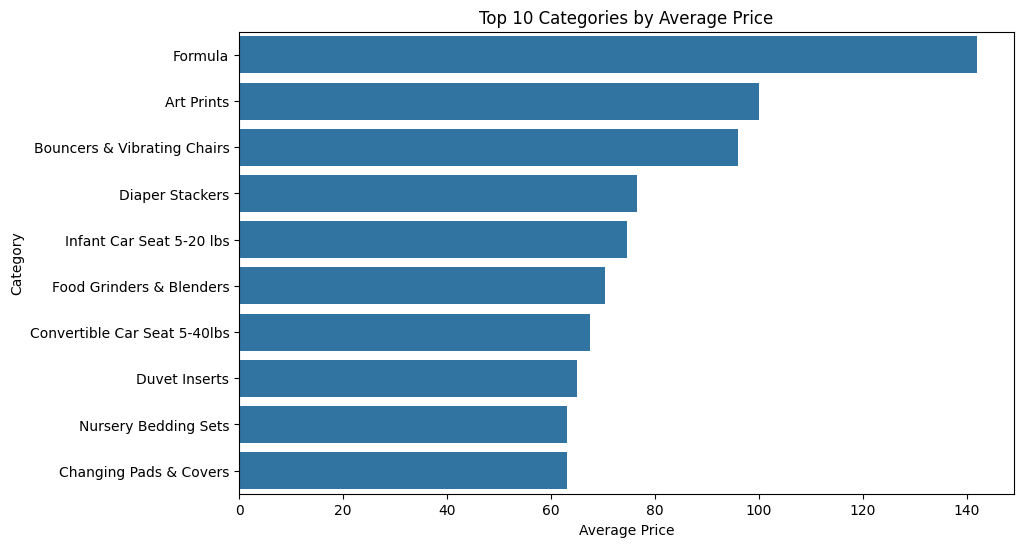

In [50]:
# Visualize the average price for top categories in a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, y='Category', x='mean', errorbar=None)
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()

### Price Comparison for New vs. Pre-owned Items

Here, we evaluate how pricing varies for new vs. pre-owned items in each category to recommend pricing based on item condition

In [60]:
# Calculate average price by category for New and Pre-owned items
new_items_price_stats = df[df['Condition'] == 'New'].groupby('Category')['Price'].mean().reset_index()
pre_owned_items_price_stats = df[df['Condition'] == 'Pre-owned'].groupby('Category')['Price'].mean().reset_index()

# Get top 10 categories by average price
top_10_new = new_items_price_stats.nlargest(10, 'Price')
top_10_pre_owned = pre_owned_items_price_stats.nlargest(10, 'Price')

# Print value counts
print("Top 10 Categories by Average Price (New items)")
print(top_10_new.value_counts())
print()
print("Top 10 Categories by Average Price (Pre-owned items)")
print(top_10_pre_owned.value_counts())

Top 10 Categories by Average Price (New items)
Category                      Price     
Art Prints                    99.990000     1
Bed Rails                     55.973333     1
Bouncers & Vibrating Chairs   95.980000     1
Convertible Car Seat 5-40lbs  67.525000     1
Crib Mattresses               57.445833     1
Diaper Stackers               76.640000     1
Food Grinders & Blenders      70.345000     1
Formula                       142.000000    1
Formula Dispensers            62.420000     1
Infant Car Seat 5-20 lbs      74.630000     1
Name: count, dtype: int64

Top 10 Categories by Average Price (Pre-owned items)
Category                            Price     
Baby Gyms, Play Mats & Jigsaw Mats  19.990000     1
Blankets & Throws                   16.781910     1
Changing Pads & Covers              18.990000     1
Cribskirts & Dust Ruffles           38.000000     1
Diaper Covers                       15.296000     1
Nursery Bedding Sets                154.950000    1
Other Nursery

In [ ]:
import plotly.express as px

# Combine both top categories into one DataFrame
top_categories_combined = pd.concat([
    top_10_new[['Category', 'Price']].assign(Condition='New'),
    top_10_pre_owned[['Category', 'Price']].assign(Condition='Pre-owned')
    ])

# Create an interactive bar plot
fig = px.bar(top_categories_combined, 
             x='Price', 
             y='Category', 
             color='Condition', 
             orientation='h', 
             title="Top 10 Categories by Average Price (New vs Pre-owned)",
             labels={'Price': 'Average Price (USD)', 'Category': 'Category'},
             color_discrete_map={'New': 'green', 'Pre-owned': 'blue'})

# Update layout for better readability
fig.update_layout(
    showlegend=True,
    height=600,  # Increase height to make room for all categories
    xaxis_title='Average Price (USD)',  # Explicitly set x-axis title
    yaxis_title='Category',  # Explicitly set y-axis title
)

fig.show()

### Price vs. Condition

Here, we want to discover how the Condition of an item (New, Pre-owned, etc.) affects the pricing

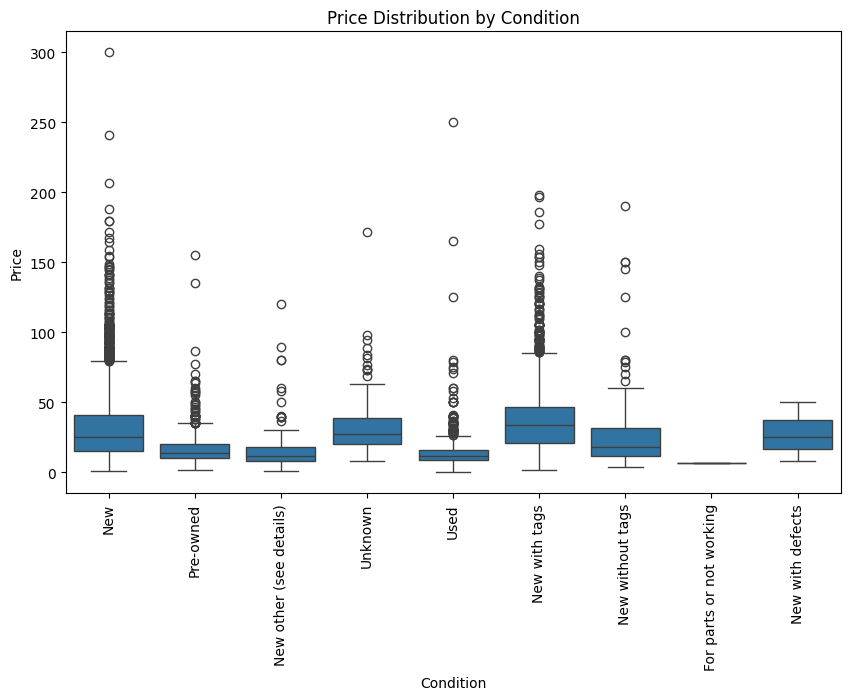

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the price distribution by condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Condition', y='Price')
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

### Price vs Buy It Now Availability

Here, we want to determine if the pricing strategy differs for Buy It Now avaibility.

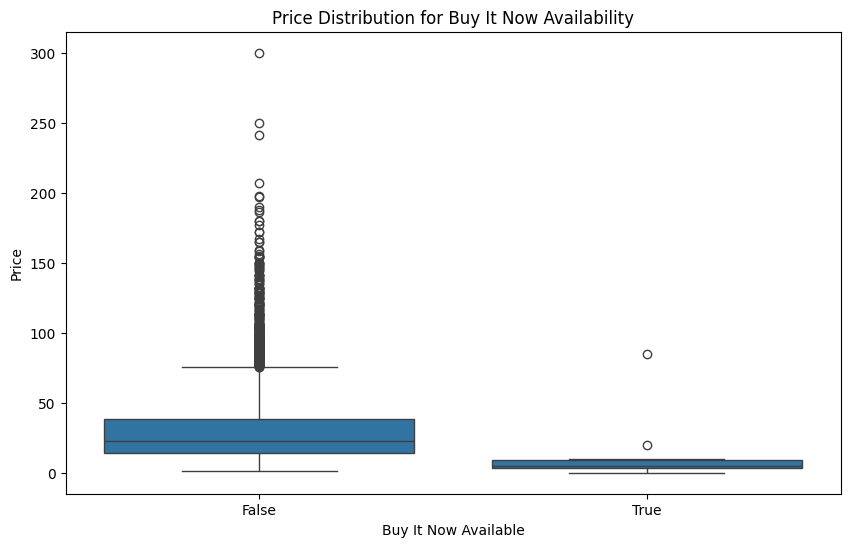

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Buy It Now Available', y='Price')
plt.title('Price Distribution for Buy It Now Availability')
plt.xlabel('Buy It Now Available')
plt.ylabel('Price')
plt.show()

### Price vs Shipping Type

Here, we want to investigate whether the Shipping Type (e.g., Free Shipping vs Paid Shipping) influences the price of an item.

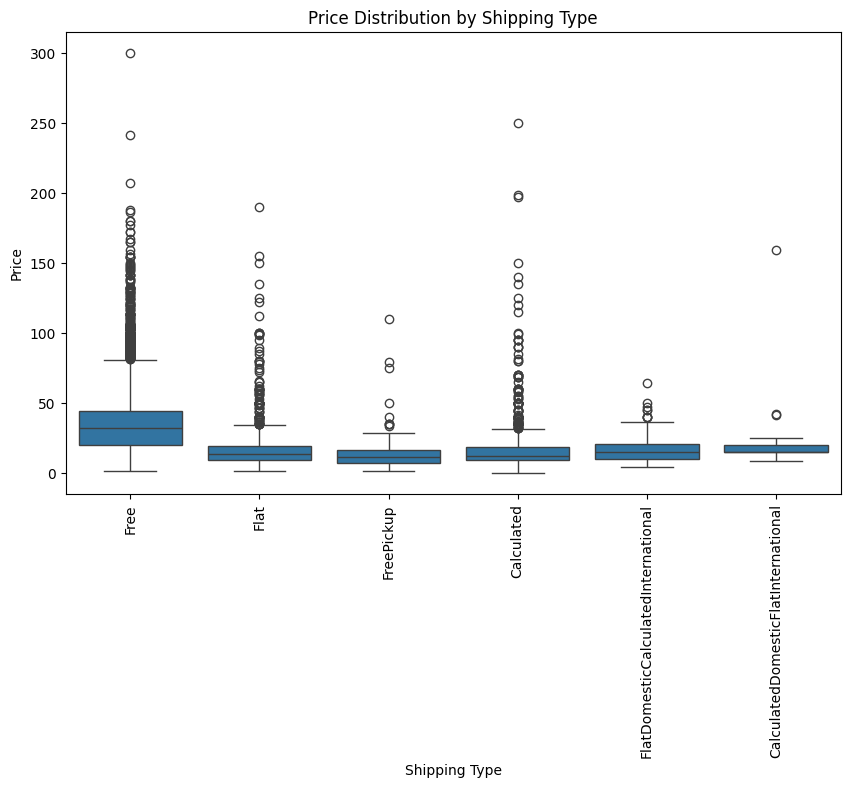

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipping Type', y='Price')
plt.title('Price Distribution by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()